IFP Project Based PDA ML Training

Description:
dataset: norne production sample

Notebook:

In [2]:
#Importing modules

import numpy as np #mathematical
import pandas as pd #dataframes
import matplotlib.pyplot as plt #vizualizations
import seaborn as sns ##statistics


In [3]:
from scipy import *

In [4]:
import math

1 Decline Curve Analysis & Linear Regression 
description
Busca transformar os dados (varios pontos dispersos) em uma curva constante (grafico de fração declinio hiperbolica )
transformando em v=v0.e^(-b)
O scipy busca encontrar o v0 e o b

In [5]:
from scipy.optimize import curve_fit

In [12]:
#Testing
#creating a list with 100 values with values betwen 0 and 100 
x = np.random.randint(0,100,100)

#creating a equation with a random noise
y = 2*x + 3 + np.random.randn(100)*5

#plt.scatter(x,y) #for dispertion
#plt.plot(x,y) #for lines

In [27]:
#Setting a linear model function to use in curve fit
def linear_model(x,m,c):
    y = m*x + c
    return y

#Setting a squarer model function to use in curve fit
def squarer_model(num1,num2):
    return np.square(num1),np.square(num2)

In [22]:
#Define the parameters to find a curve that fit with data dispertions
params = curve_fit(linear_model,x,y)
m,c = params[0] #Only parameters[0] is useful in this function (i dont know what is the others parameters meaning)

#Setting curve with result's parameters of curve_fit function
curve = linear_model(x,m,c)


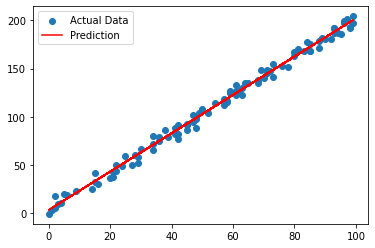

In [26]:
#Plotting graphs actual data and fit

plt.scatter(x,y,label='Actual Data')
plt.plot(x,curve, color='red',label='Prediction')

plt.legend()

Using a real dataset RATE OF OIL/GAS (SCF per day) PRODUCTION

A standard cubic foot (scf) is a unit used both in the natural gas industry to represent an amount of natural gas and in other industries where other gases are used. It is the unit commonly used when following the customary system, a collection of standards set by the National Institute of Standards and Technology. Another unit used for the same purpose is the standard cubic metre (Sm3), customary when using SI units.[Font: Wikipedia]



In [51]:
#Loading the data set
dca_df = pd.read_csv("norne_production_rate_sample.csv",index_col=0,parse_dates=True)
dca_df.head()


,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


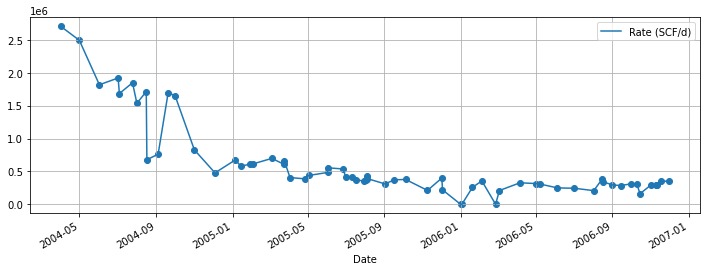

In [57]:
#Visualizing
dca_df.plot(figsize=(12,4))
plt.grid() #line graph
plt.scatter(y=dca_df['Rate (SCF/d)'],x=dca_df.index) #dispersion graph

In [58]:
#Setting a function day maker

def day_maker(df):
    
    #This fuctions get the difference between the days
    
    
    days = []
    
    for d in range(len(df)):
        
        x = df.index[d] - df.index[0]
        days.append(x.days)
    
    days = np.array(days)
    
    return days

In [63]:
dca_df['days'] = day_maker(dca_df)
dca_df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


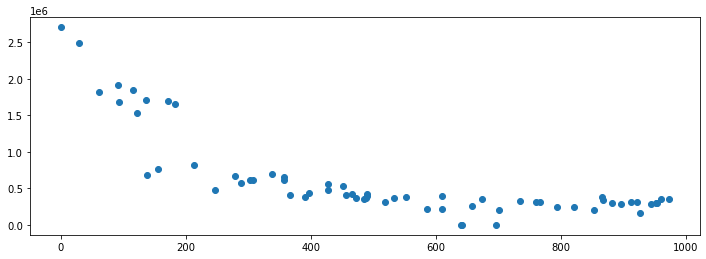

In [74]:
#Visualizing now production x days
plt.figure(figsize=(12,4))
plt.scatter(y=dca_df['Rate (SCF/d)'],x=dca_df['days']) #dispersion graph

In [88]:
#The graph above seems like a hyperbolical function, so we need to fit a curve that combine with the graph 'scf x day'
#Otherwise, we need to normalize the graph too

#Video part: 47:00

#Setting up a hyperbolical model function
def q_hyp(t,qi,b,d):
    qfit = qi/(np.abs((1+b*d*t))**(1/b))
    return qfit

def hyp_fitter(q,t):
    
    #Normalizing: get all data columns and divide by their maximum values
    #Then we will get a new columns with new values q_n(rate) and t_n(date)
    q_n = q/max(q)
    t_n = t/max(t)
             
    #Curve fit (Optimization of parameters)
    params = curve_fit(q_hyp,t_n,q_n)
    [qi,b,d] = params[0]
    
    #These parameters are for normalize t and q
    #So we need to readjust q and t and get their non normalized values again
    d_f = d/max(t)
    qi_f = qi*max(q)
             
    #Now we can use these parameters
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit, params

In [90]:
#Setting up the parameters to get a hyperbolic graph fit
q = dca_df['Rate (SCF/d)']
t = dca_df['days']
q_fit,params = hyp_fitter(q,t)

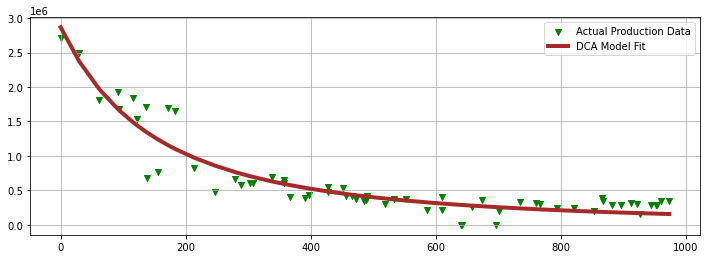

In [93]:
#Visualization
plt.figure(figsize=(12,4))
plt.scatter(t,q,marker='v',color='green',label='Actual Production Data')
plt.plot(t,q_fit,color='brown',lw=4,label='DCA Model Fit')

plt.grid()
plt.legend()

Caso saiba o padrão da função (linear, hiperbolica, etc), o método DCA funciona muito bem para realizar previsoes de produção.
No entanto, há casos que não é possível realizar essa previsão pois há variáveis que não se adequam a modelos de equações.
Nesse caso é preciso utilizar modelos de machine learning para realizar as predições